In [1]:
from main import create_plot

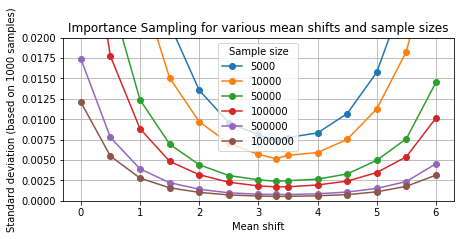

In [2]:
fig = create_plot(12)